# Banana Harvest Prediction

In [253]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [254]:
# read csv
df = pd.read_csv('./dataset/harvest_dataset_v2.csv')

In [255]:
df.head()

,Plant ID,Variety,Agro-climatic region,"Plant density(Min=1,Max=5)",Spacing between plants (m),Plant generation,"Pesticides used(Yes, No)",If Yes what Category of pesticides have used,Fertilizer type,Soil pH,Amount of sunlight received,Watering schedule,Number of leaves,Height (m),Yield per plant (kg)
0,1,Amban Banana,Wet Zone,1,2.460376,1,No,NaN,Non Organic,7.727555,Low,randomly,16,6.611576,29.211468
1,2,Amban Banana,Dry Zone,5,2.300503,2,Yes,Nematicides,None,7.327381,Low,Daily,14,2.632597,29.712649
2,3,Mysore Banana,Wet Zone,3,1.436256,2,Yes,Fungicides,Non Organic,5.020692,Moderate,none,13,7.269761,30.989809
3,4,Mysore Banana,Intermediate Zone,1,4.822149,4,Yes,Fungicides,Organic,8.496778,High,twice a week,13,3.778071,23.613034
4,5,Amban Banana,Intermediate Zone,3,2.083826,2,Yes,Insecticides,Non Organic,5.410360,High,none,14,7.077158,29.143216


## 1. Feature Description
---
| Property | Description |
|----------|-------------|
| Plant ID | Unique identifier for each banana plant |
| Variety | The type of banana variety being grown (e.g. Cavendish, Williams, etc.) |
| Agro-climatic region | The region in Sri Lanka where the plant is being grown (Wet Zone, Intermediate Zone, or Dry Zone) |
| Plant density | The number of banana plants per unit area of land |
| Spacing between plants | The distance between adjacent banana plants |
| Plant generation | Whether the plant is a first generation or subsequent generation plant |
| Fertilizer type | The type of fertilizer used (organic or chemical) |
| Soil pH | The pH level of the soil where the plant is being grown |
| Amount of sunlight received | The amount of sunlight the plant receives (low, moderate, or high) |
| Watering schedule | The frequency of watering (daily, twice a week, once a week, or no watering) |
| Number of days for flower initiation | The number of days it takes for the plant to begin producing flowers |
| Number of leaves | The number of leaves on the plant |
| Height (in feet) | The height of the plant |
| Yield per plant (kg) | The yield of bananas produced by the plant |

Each row in the dataset would contain the values of these properties for a single banana plant. The yield per plant would be the target variable, which is what we are trying to predict.

In [256]:
df.columns

Index(['Plant ID', 'Variety', 'Agro-climatic region',
       'Plant density(Min=1,Max=5)', 'Spacing between plants (m)',
       'Plant generation', 'Pesticides used(Yes, No)',
       'If Yes what Category of pesticides have used', 'Fertilizer type',
       'Soil pH', 'Amount of sunlight received', 'Watering schedule',
       'Number of leaves', 'Height (m)', 'Yield per plant (kg)'],
      dtype='object')

## 2. Exploratory Data Analysis(EDA)

In [257]:
# database shape
df.shape

(3500, 15)

In [258]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Plant ID                                      3500 non-null   int64  
 1   Variety                                       3500 non-null   object 
 2   Agro-climatic region                          3500 non-null   object 
 3   Plant density(Min=1,Max=5)                    3500 non-null   int64  
 4   Spacing between plants (m)                    3500 non-null   float64
 5   Plant generation                              3500 non-null   object 
 6   Pesticides used(Yes, No)                      3500 non-null   object 
 7   If Yes what Category of pesticides have used  1726 non-null   object 
 8   Fertilizer type                               3500 non-null   object 
 9   Soil pH                                       3500 non-null   f

In [259]:
# is there missing data
df.isnull().any()

Plant ID                                        False
Variety                                         False
Agro-climatic region                            False
Plant density(Min=1,Max=5)                      False
Spacing between plants (m)                      False
Plant generation                                False
Pesticides used(Yes, No)                        False
If Yes what Category of pesticides have used     True
Fertilizer type                                 False
Soil pH                                         False
Amount of sunlight received                     False
Watering schedule                               False
Number of leaves                                False
Height (m)                                      False
Yield per plant (kg)                            False
dtype: bool

<AxesSubplot:>

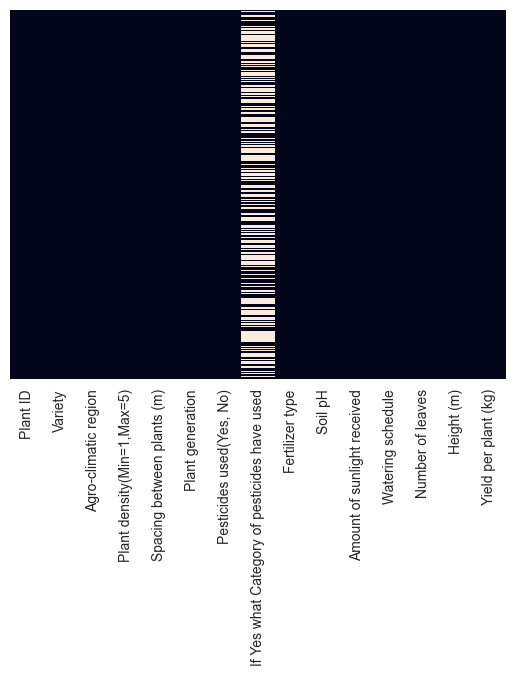

In [260]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

> Seems `If Yes what Category of pesticides have used` is majority null

In [261]:
# drop that column
df = df.dropna(axis=1)

Index(['Plant ID', 'Variety', 'Agro-climatic region',
       'Plant density(Min=1,Max=5)', 'Spacing between plants (m)',
       'Plant generation', 'Pesticides used(Yes, No)', 'Fertilizer type',
       'Soil pH', 'Amount of sunlight received', 'Watering schedule',
       'Number of leaves', 'Height (m)', 'Yield per plant (kg)'],
      dtype='object')

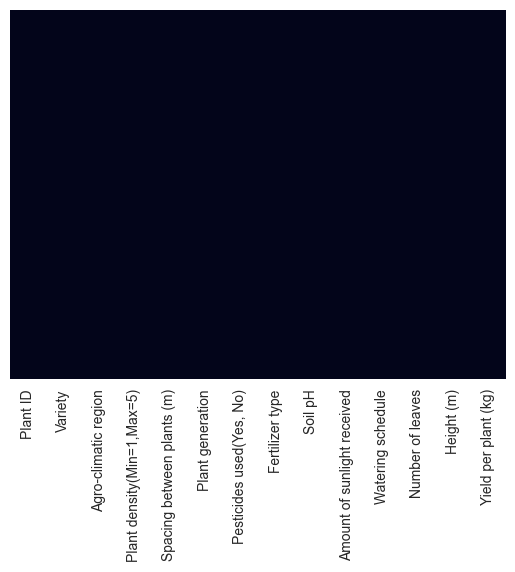

In [262]:

sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
df.columns

In [263]:
# what are the null rows
null_yields = df[df['Yield per plant (kg)'].isnull()]
null_yields.head()

,Plant ID,Variety,Agro-climatic region,"Plant density(Min=1,Max=5)",Spacing between plants (m),Plant generation,"Pesticides used(Yes, No)",Fertilizer type,Soil pH,Amount of sunlight received,Watering schedule,Number of leaves,Height (m),Yield per plant (kg)


In [264]:
# summary of statistics
df.describe()

,Plant ID,"Plant density(Min=1,Max=5)",Spacing between plants (m),Soil pH,Number of leaves,Height (m),Yield per plant (kg)
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,3.003143,3.012335,6.481023,15.620286,5.388547,26.109945
std,1010.507298,1.397643,1.157967,1.460073,2.551911,2.043105,2.537662
min,1.000000,1.000000,1.000384,4.000782,10.000000,1.813004,13.866950
25%,875.750000,2.000000,2.002683,5.235266,14.000000,3.657891,24.415636
50%,1750.500000,3.000000,3.036091,6.438947,16.000000,5.349872,26.437814
75%,2625.250000,4.000000,4.001032,7.748170,18.000000,7.138735,28.191129
max,3500.000000,5.000000,4.995545,8.998983,20.000000,8.994779,30.989809


##### What are the varieties available?

In [265]:
df['Variety'].unique()

array(['Amban Banana', 'Mysore Banana', 'Pisang Awak Banana',
       'Silk Banana', 'Anamalu Banana'], dtype=object)

Text(0.5, 1.0, 'Distribution of Varieties')

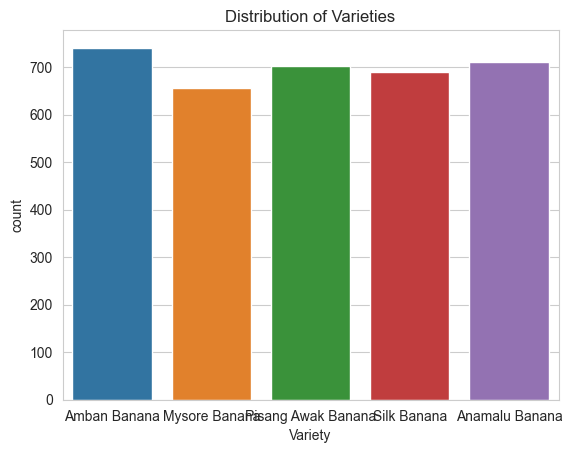

In [266]:
sns.countplot(x='Variety', data=df)
# add a title to the plot
plt.title('Distribution of Varieties')

> `Robusta`, `Gros Michewarf`, `Cavendish` have lesser records compared to other varieties

In [267]:
df['Agro-climatic region'].unique()

array(['Wet Zone', 'Dry Zone', 'Intermediate Zone'], dtype=object)

Text(0.5, 1.0, 'Agro-climatic region')

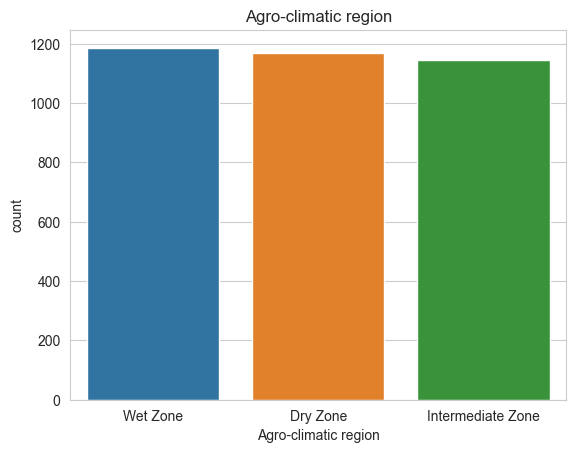

In [268]:
sns.countplot(x='Agro-climatic region', data=df)
# add a title to the plot
plt.title('Agro-climatic region')

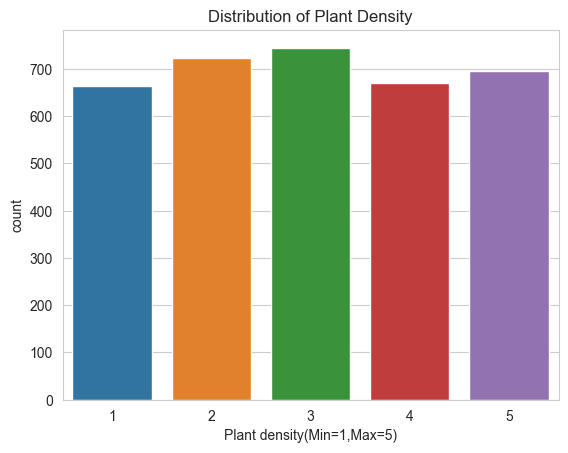

In [269]:
sns.set_style('whitegrid')
sns.countplot(x='Plant density(Min=1,Max=5)', data=df)
plt.title('Distribution of Plant Density')
plt.show()

> - Plant density 3 is the most common plant density in the dataset
> - Plant density 2 and 5 is the least common plant density in the dataset

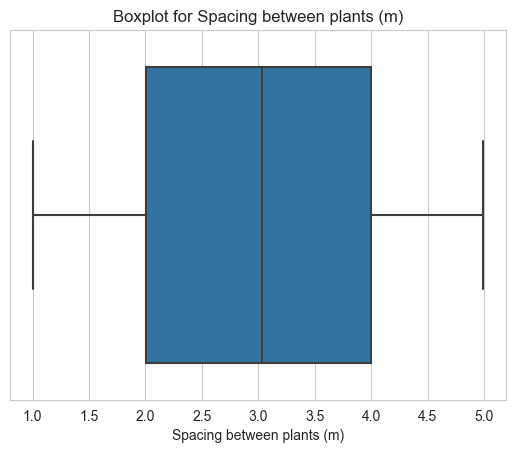

In [270]:
# Create a boxplot
sns.boxplot(x="Spacing between plants (m)", data=df)
plt.title("Boxplot for Spacing between plants (m)")
plt.show()

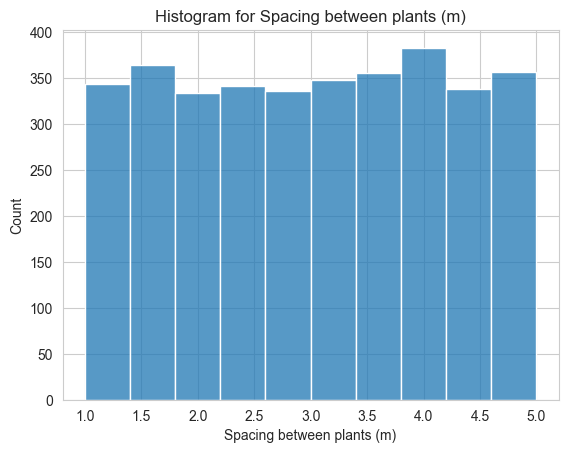

In [271]:
# Create a histogram
sns.histplot(x="Spacing between plants (m)", data=df, bins=10)
plt.title("Histogram for Spacing between plants (m)")
plt.show()

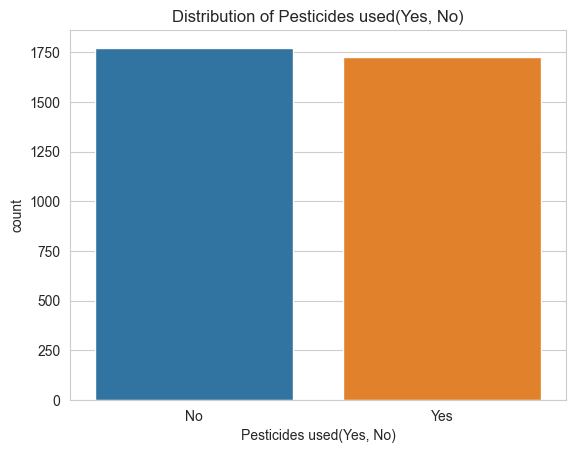

In [272]:
sns.countplot(x='Pesticides used(Yes, No)', data=df)
plt.title('Distribution of Pesticides used(Yes, No)')
plt.show()

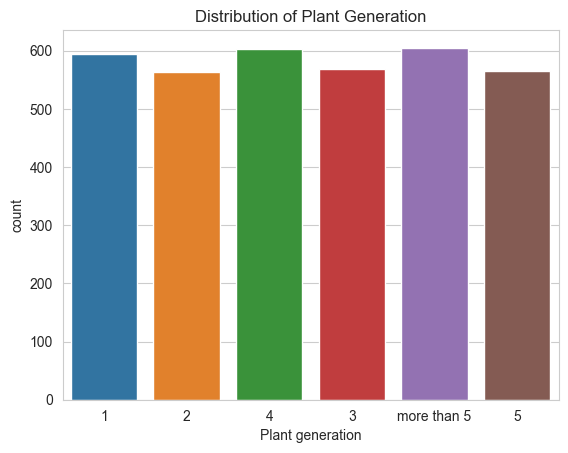

In [273]:
sns.countplot(x='Plant generation', data=df)
plt.title('Distribution of Plant Generation')
plt.show()

In [274]:
df['Fertilizer type'].unique()

array(['Non Organic', 'None', 'Organic', 'Both used'], dtype=object)

Text(0.5, 1.0, 'Distribution of Fertilizer Type')

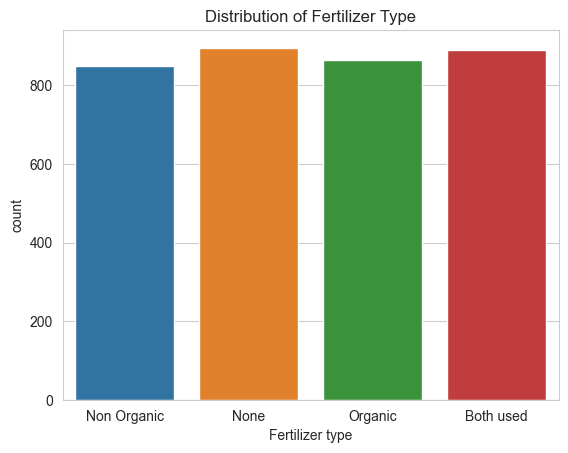

In [275]:
sns.countplot(x='Fertilizer type', data=df)
# add a title to the plot
plt.title('Distribution of Fertilizer Type')

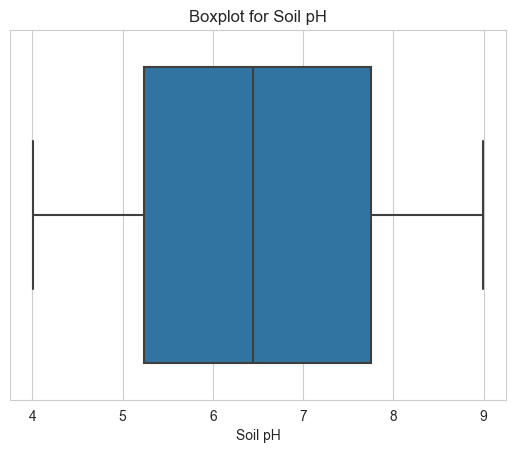

In [276]:

# Create a boxplot
sns.boxplot(x="Soil pH", data=df)
plt.title("Boxplot for Soil pH")
plt.show()

In [277]:
df['Amount of sunlight received'].unique()

array(['Low', 'Moderate', 'High'], dtype=object)

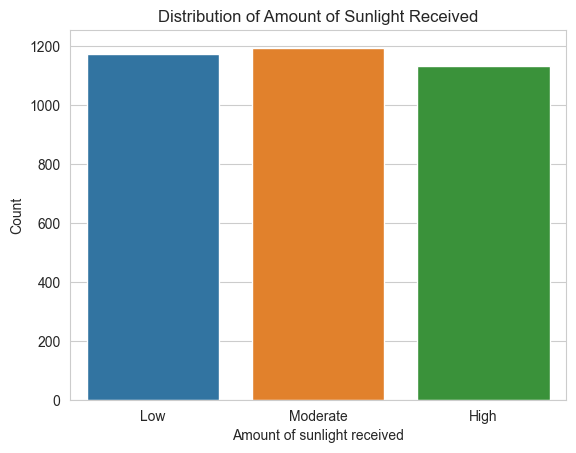

In [278]:
sns.countplot(x='Amount of sunlight received', data=df)
plt.title('Distribution of Amount of Sunlight Received')
plt.xlabel('Amount of sunlight received')
plt.ylabel('Count')
plt.show()

In [279]:
df['Watering schedule'].unique()

array(['randomly', 'Daily', 'none', 'twice a week', '3 times a week'],
      dtype=object)

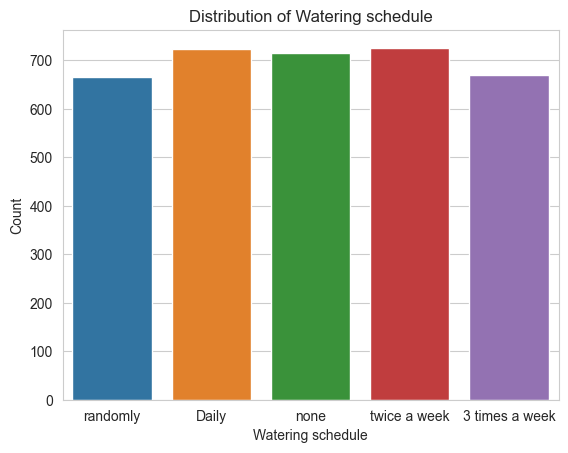

In [280]:
sns.countplot(x='Watering schedule', data=df)
plt.title('Distribution of Watering schedule')
plt.xlabel('Watering schedule')
plt.ylabel('Count')
plt.show()

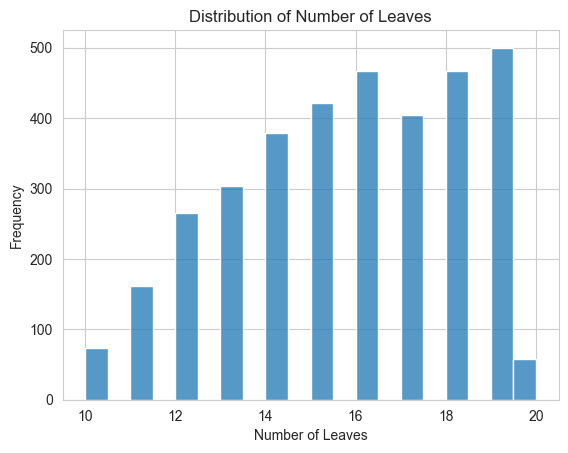

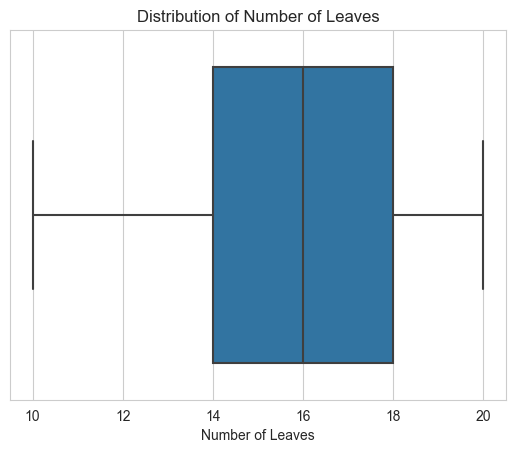

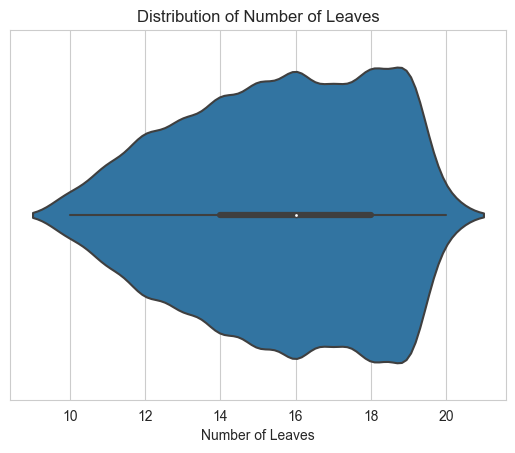

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  app.launch_new_instance()


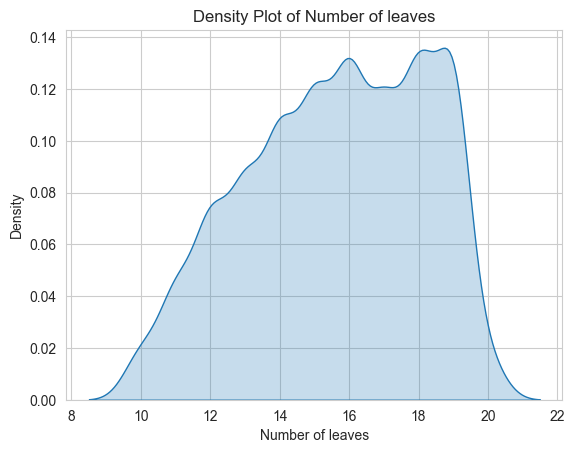

In [281]:
sns.histplot(df['Number of leaves'], bins=20)
plt.title('Distribution of Number of Leaves')
plt.xlabel('Number of Leaves')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['Number of leaves'])
plt.title('Distribution of Number of Leaves')
plt.xlabel('Number of Leaves')
plt.show()

sns.violinplot(x=df['Number of leaves'])
plt.title('Distribution of Number of Leaves')
plt.xlabel('Number of Leaves')
plt.show()

sns.kdeplot(df['Number of leaves'], shade=True)
plt.title('Density Plot of Number of leaves')
plt.xlabel('Number of leaves')
plt.ylabel('Density')
plt.show()

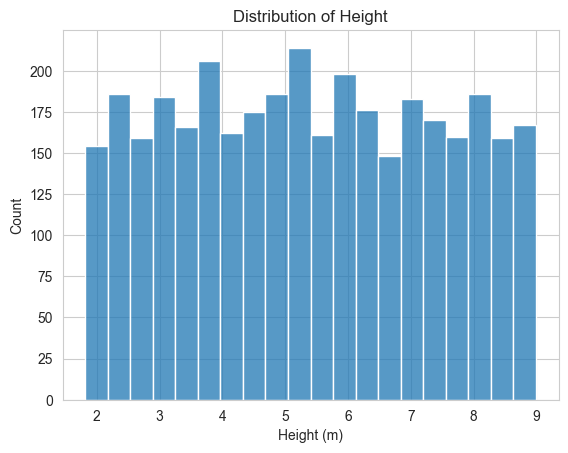

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


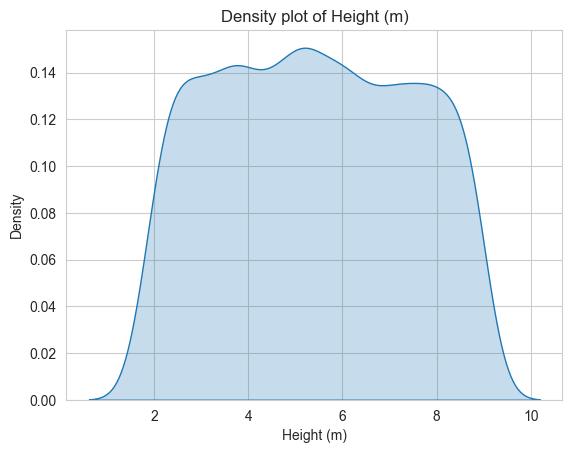

In [282]:
# Plot for 'Height (m)'
sns.histplot(df['Height (m)'], bins=20, kde=False)
plt.title('Distribution of Height')
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.show()

sns.kdeplot(df['Height (m)'], shade=True)
plt.title('Density plot of Height (m)')
plt.show()

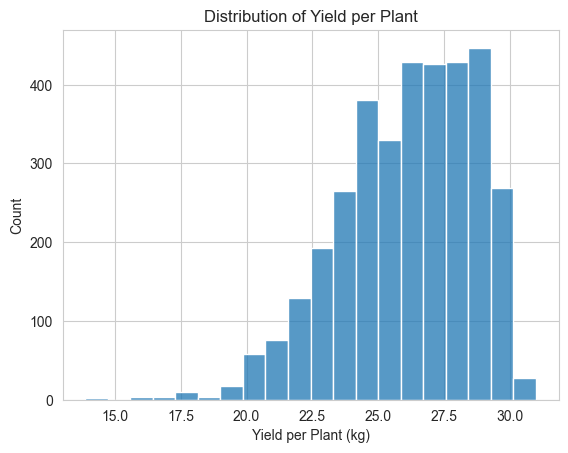

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


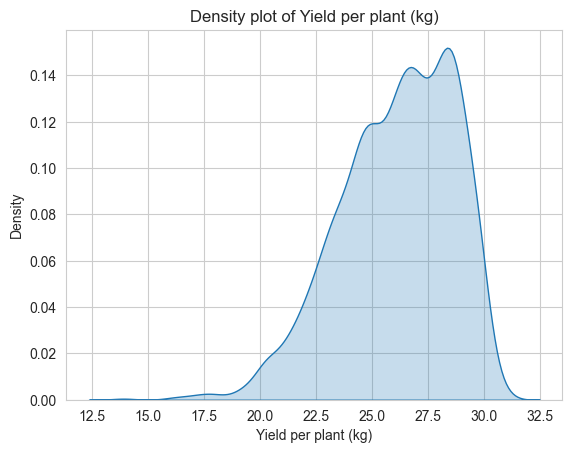

In [283]:
# Plot for 'Yield per plant (kg)'
sns.histplot(df['Yield per plant (kg)'], bins=20, kde=False)
plt.title('Distribution of Yield per Plant')
plt.xlabel('Yield per Plant (kg)')
plt.ylabel('Count')
plt.show()

sns.kdeplot(df['Yield per plant (kg)'], shade=True)
plt.title('Density plot of Yield per plant (kg)')
plt.show()

#### Relationship between features

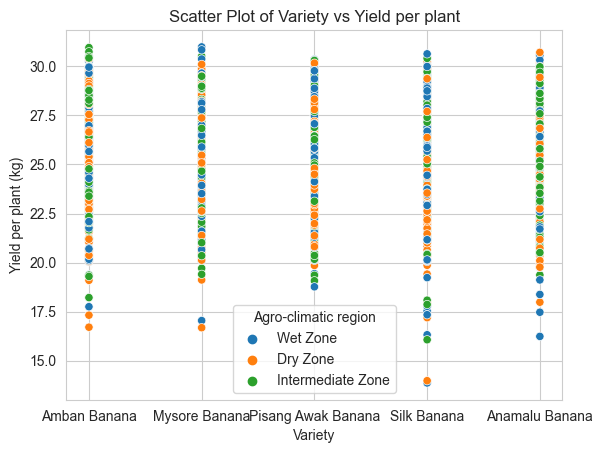

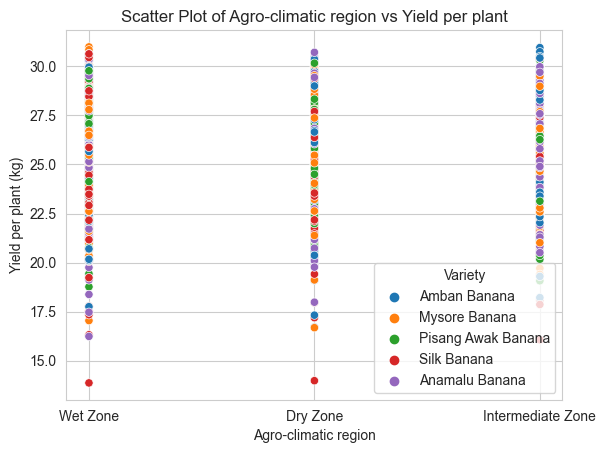

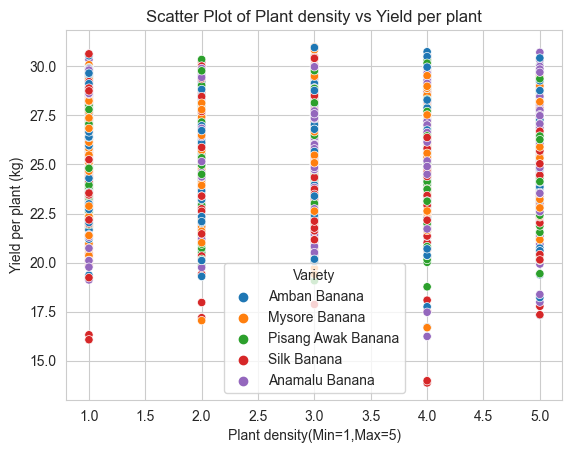

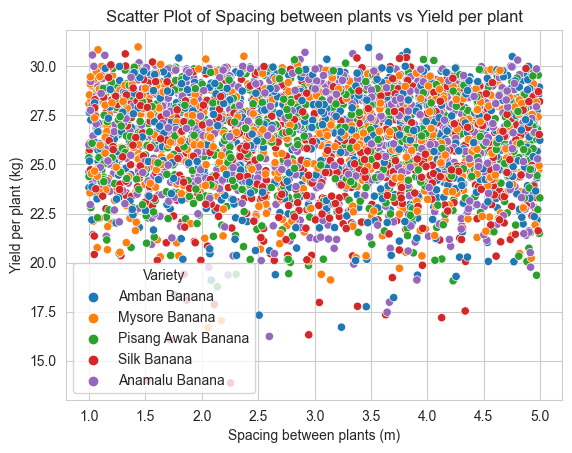

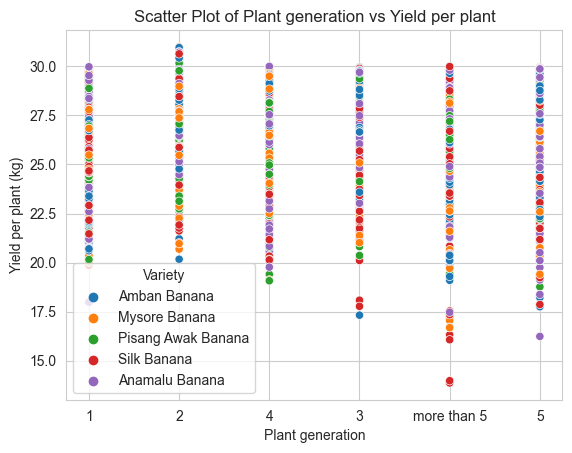

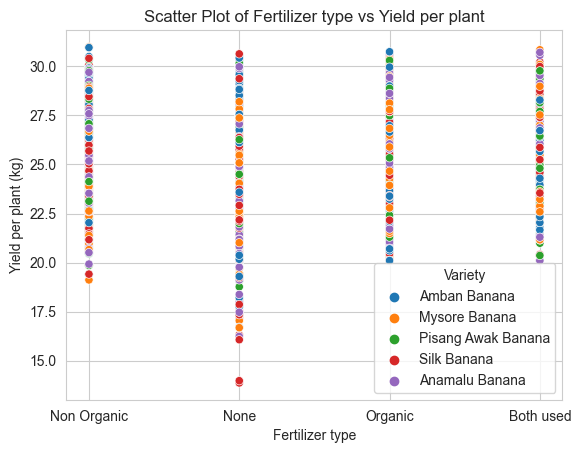

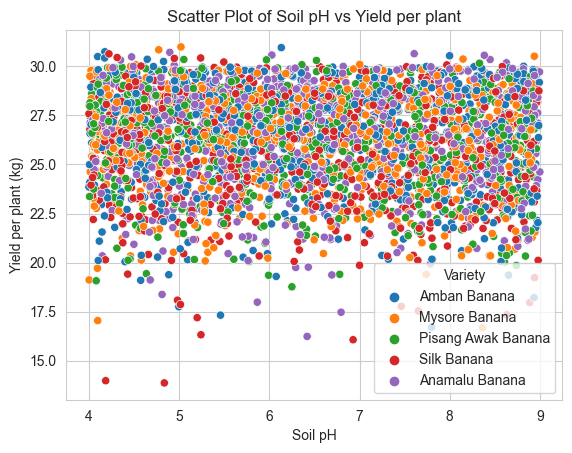

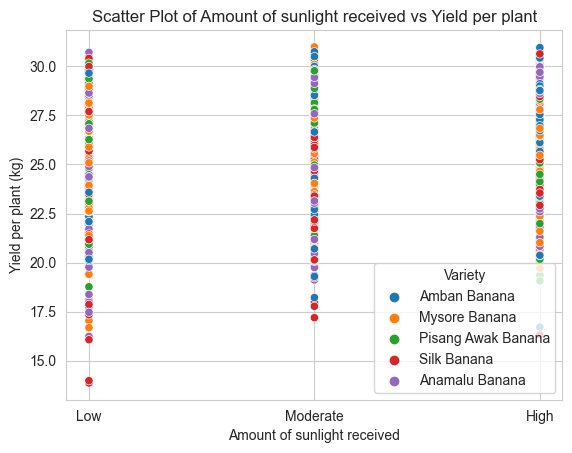

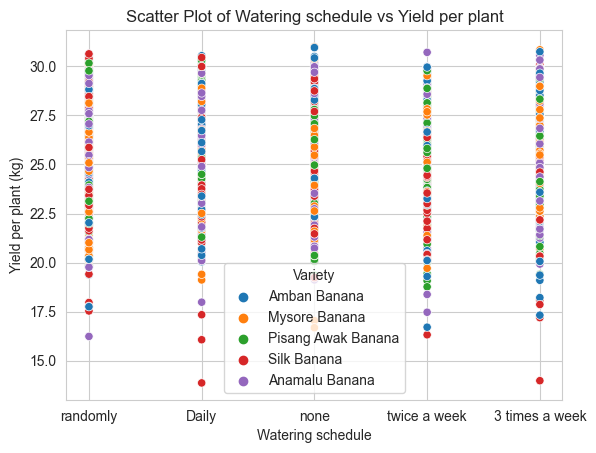

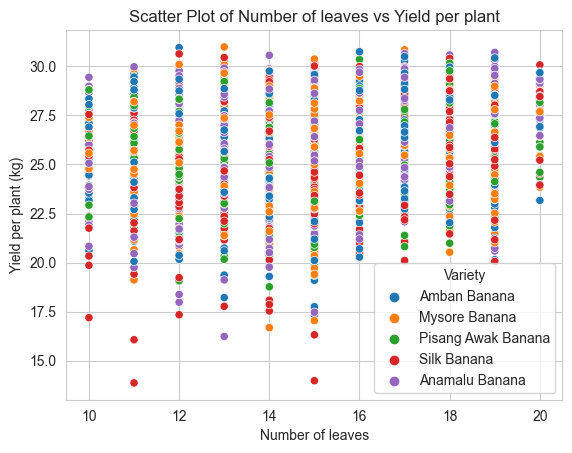

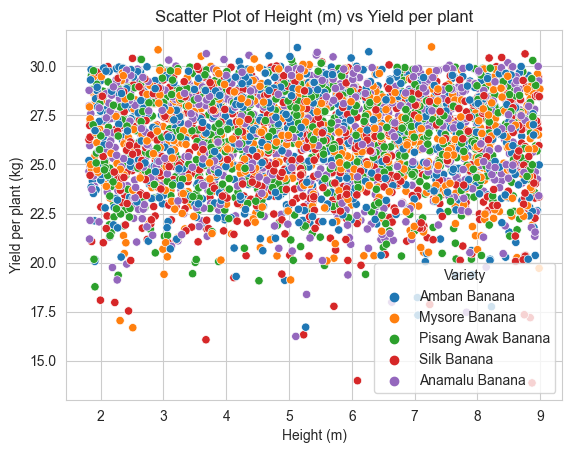

In [284]:
# Scatter plot for 'Variety' vs 'Yield per plant'
sns.scatterplot(x='Variety', y='Yield per plant (kg)', hue='Agro-climatic region', data=df)
plt.title('Scatter Plot of Variety vs Yield per plant')
plt.show()

# Scatter plot for 'Agro-climatic region' vs 'Yield per plant'
sns.scatterplot(x='Agro-climatic region', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Agro-climatic region vs Yield per plant')
plt.show()

# Scatter plot for 'Plant density' vs 'Yield per plant'
sns.scatterplot(x='Plant density(Min=1,Max=5)', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Plant density vs Yield per plant')
plt.show()

# Scatter plot for 'Spacing between plants (m)' vs 'Yield per plant'
sns.scatterplot(x='Spacing between plants (m)', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Spacing between plants vs Yield per plant')
plt.show()

# Scatter plot for 'Plant generation' vs 'Yield per plant'
sns.scatterplot(x='Plant generation', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Plant generation vs Yield per plant')
plt.show()

# Scatter plot for 'Fertilizer type' vs 'Yield per plant'
sns.scatterplot(x='Fertilizer type', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Fertilizer type vs Yield per plant')
plt.show()

# Scatter plot for 'Soil pH' vs 'Yield per plant'
sns.scatterplot(x='Soil pH', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Soil pH vs Yield per plant')
plt.show()

# Scatter plot for 'Amount of sunlight received' vs 'Yield per plant'
sns.scatterplot(x='Amount of sunlight received', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Amount of sunlight received vs Yield per plant')
plt.show()

# Scatter plot for 'Watering schedule' vs 'Yield per plant'
sns.scatterplot(x='Watering schedule', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Watering schedule vs Yield per plant')
plt.show()

# Scatter plot for 'Number of leaves' vs 'Yield per plant'
sns.scatterplot(x='Number of leaves', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Number of leaves vs Yield per plant')
plt.show()

# Scatter plot for 'Height (m)' vs 'Yield per plant'
sns.scatterplot(x='Height (m)', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Height (m) vs Yield per plant')
plt.show()

In [285]:
range_gap = 3
max_value = df['Yield per plant (kg)'].max()
upper_bound = math.ceil(max_value / range_gap) * range_gap

bin_edges = [i for i in range(0, upper_bound+range_gap, range_gap)]
# create bin labels dynamically
bin_labels = [f"{bin_edges[i]}-{bin_edges[i+1]-1} kg" for i in range(len(bin_edges)-1)]
print(f'Max Value: {max_value}')
print(f'Bins:{bin_labels}')
      # Use the pd.cut() function to create a new column with the range labels
df['Yield per plant range'] = pd.cut(df['Yield per plant (kg)'], bins=bin_edges, labels=bin_labels)
df.head(50)

Max Value: 30.98980924
Bins:['0-2 kg', '3-5 kg', '6-8 kg', '9-11 kg', '12-14 kg', '15-17 kg', '18-20 kg', '21-23 kg', '24-26 kg', '27-29 kg', '30-32 kg']


,Plant ID,Variety,Agro-climatic region,"Plant density(Min=1,Max=5)",Spacing between plants (m),Plant generation,"Pesticides used(Yes, No)",Fertilizer type,Soil pH,Amount of sunlight received,Watering schedule,Number of leaves,Height (m),Yield per plant (kg),Yield per plant range
0,1,Amban Banana,Wet Zone,1,2.460376,1,No,Non Organic,7.727555,Low,randomly,16,6.611576,29.211468,27-29 kg
1,2,Amban Banana,Dry Zone,5,2.300503,2,Yes,None,7.327381,Low,Daily,14,2.632597,29.712649,27-29 kg
2,3,Mysore Banana,Wet Zone,3,1.436256,2,Yes,Non Organic,5.020692,Moderate,none,13,7.269761,30.989809,30-32 kg
3,4,Mysore Banana,Intermediate Zone,1,4.822149,4,Yes,Organic,8.496778,High,twice a week,13,3.778071,23.613034,21-23 kg
4,5,Amban Banana,Intermediate Zone,3,2.083826,2,Yes,Non Organic,5.410360,High,none,14,7.077158,29.143216,27-29 kg
5,6,Pisang Awak Banana,Intermediate Zone,5,3.663665,2,No,None,8.800298,Low,twice a week,14,2.546754,23.770442,21-23 kg
6,7,Mysore Banana,Intermediate Zone,3,2.373310,2,No,None,8.937454,Low,Daily,19,3.601455,30.515430,30-32 kg
7,8,Silk Banana,Wet Zone,4,2.730587,2,Yes,Organic,6.071412,High,randomly,13,3.375541,27.632399,27-29 kg
8,9,Silk Banana,Dry Zone,1,1.824356,3,Yes,Non Organic,4.989748,Moderate,none,11,4.845436,22.057272,21-23 kg
9,10,Mysore Banana,Dry Zone,3,3.601390,2,No,Non Organic,7.138164,Low,twice a week,17,7.223556,28.910258,27-29 kg


<AxesSubplot:ylabel='Yield per plant range'>

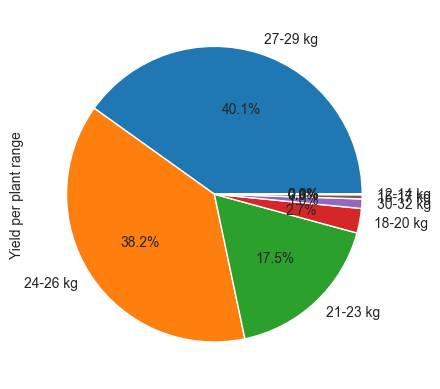

In [286]:
# Count the number of data points in each range
range_counts = df['Yield per plant range'].value_counts()

# Plot a pie chart of the range proportions
range_counts.plot.pie(autopct='%1.1f%%', labels=range_counts.index)

## 3. Correlation Matrix

<AxesSubplot:>

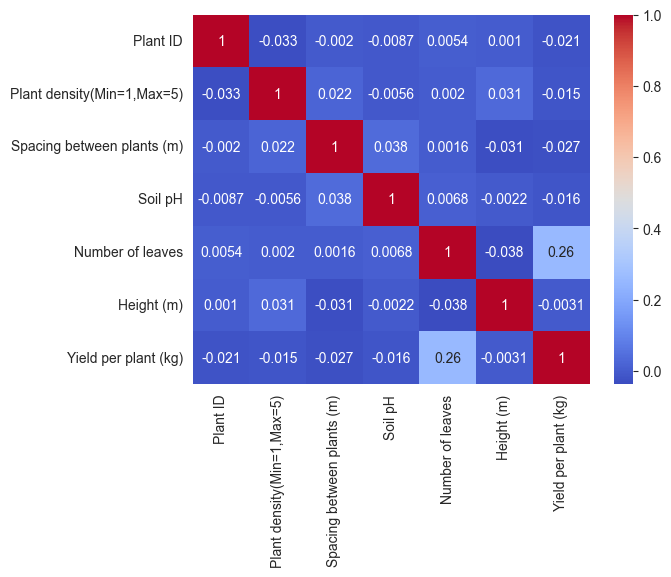

In [287]:
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

> No highly correlated features(considered threshold = 0.9)

## 3. Data Pre Processing

In [288]:
# drop plant id column
df.drop(['Plant ID', 'Yield per plant (kg)'], axis=1, inplace=True)
df.head(50)

,Variety,Agro-climatic region,"Plant density(Min=1,Max=5)",Spacing between plants (m),Plant generation,"Pesticides used(Yes, No)",Fertilizer type,Soil pH,Amount of sunlight received,Watering schedule,Number of leaves,Height (m),Yield per plant range
0,Amban Banana,Wet Zone,1,2.460376,1,No,Non Organic,7.727555,Low,randomly,16,6.611576,27-29 kg
1,Amban Banana,Dry Zone,5,2.300503,2,Yes,None,7.327381,Low,Daily,14,2.632597,27-29 kg
2,Mysore Banana,Wet Zone,3,1.436256,2,Yes,Non Organic,5.020692,Moderate,none,13,7.269761,30-32 kg
3,Mysore Banana,Intermediate Zone,1,4.822149,4,Yes,Organic,8.496778,High,twice a week,13,3.778071,21-23 kg
4,Amban Banana,Intermediate Zone,3,2.083826,2,Yes,Non Organic,5.410360,High,none,14,7.077158,27-29 kg
5,Pisang Awak Banana,Intermediate Zone,5,3.663665,2,No,None,8.800298,Low,twice a week,14,2.546754,21-23 kg
6,Mysore Banana,Intermediate Zone,3,2.373310,2,No,None,8.937454,Low,Daily,19,3.601455,30-32 kg
7,Silk Banana,Wet Zone,4,2.730587,2,Yes,Organic,6.071412,High,randomly,13,3.375541,27-29 kg
8,Silk Banana,Dry Zone,1,1.824356,3,Yes,Non Organic,4.989748,Moderate,none,11,4.845436,21-23 kg
9,Mysore Banana,Dry Zone,3,3.601390,2,No,Non Organic,7.138164,Low,twice a week,17,7.223556,27-29 kg


#### Split dataset into independant and dependant variables

In [289]:
X = df.drop('Yield per plant range', axis=1)
y = df['Yield per plant range']

## 4. Data Encoding

#### OneHot encode
>One-hot encoding is a technique used to convert categorical data into numerical data.
> In machine learning, we often encounter datasets that contain categorical features
> such as colors, cities, or types of products. These categorical features can't be
 > used directly in most machine learning models because they require numerical data.
>
>One-hot encoding solves this problem by converting categorical features into binary
> vectors. Each category is assigned a unique binary vector, with a 1 in the position
> corresponding to that category, and 0s elsewhere.
> >For example,
> >if we have three categories `A`, `B`, and `C`, then
> >
> > `A=[1, 0, 0]`, `B=[0, 1, 0]`, and `C=[0, 0, 1]`.
>
> By using one-hot encoding, we can transform categorical data into numerical data
> that can be used in machine learning models. One-hot encoding helps models to
> capture non-linear relationships between categorical features and the target
> variable. It also prevents the model from assigning ordinality to the categories,
> which could introduce bias in the analysis.
>
> In summary, one-hot encoding is a technique used to transform categorical data
> into binary vectors, making it suitable for use in machine learning models.


 Following columns are OneHot Encoded`Variety`, `Agro-climatic region`, `Fertilizer type`

In [290]:
X.head()

,Variety,Agro-climatic region,"Plant density(Min=1,Max=5)",Spacing between plants (m),Plant generation,"Pesticides used(Yes, No)",Fertilizer type,Soil pH,Amount of sunlight received,Watering schedule,Number of leaves,Height (m)
0,Amban Banana,Wet Zone,1,2.460376,1,No,Non Organic,7.727555,Low,randomly,16,6.611576
1,Amban Banana,Dry Zone,5,2.300503,2,Yes,None,7.327381,Low,Daily,14,2.632597
2,Mysore Banana,Wet Zone,3,1.436256,2,Yes,Non Organic,5.020692,Moderate,none,13,7.269761
3,Mysore Banana,Intermediate Zone,1,4.822149,4,Yes,Organic,8.496778,High,twice a week,13,3.778071
4,Amban Banana,Intermediate Zone,3,2.083826,2,Yes,Non Organic,5.410360,High,none,14,7.077158


In [291]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pickle

# One-hot encode categorical columns
ohe_cols = ['Variety', 'Agro-climatic region', 'Fertilizer type', 'Pesticides used(Yes, No)']
ohe = OneHotEncoder(sparse=False, drop='first')
ohe_data = ohe.fit_transform(df[ohe_cols])

# Save the encoder object using pickle
with open('harvest_data_one_hot_encoded.pkl', 'wb') as f:
    pickle.dump(ohe, f)

# Print the encoded labels and their corresponding arrays
encoded_labels = ohe.get_feature_names_out(ohe_cols)
encoded_dict = {}
for i, label in enumerate(encoded_labels):
    encoded_dict[label] = ohe_data[:, i].tolist()
print(encoded_dict)

{'Variety_Anamalu Banana': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

#### Ordinal Encode
>Ordinal encoding is a technique used to convert categorical variables
(variables with limited and fixed set of possible values) into numerical variables.
 It assigns a unique numerical value to each category, based on their alphabetical
> order or their frequency of occurrence.
> > For example,
> > if we have a categorical variable called `"Fruit"` with categories
> >`"Apple", "Banana"`, and `"Orange"`,
> > label encoding would assign the values `0, 1,` and `2` respectively.
>
> This helps in making categorical variables usable for machine learning algorithms,
> as most algorithms require numerical data as input. However, it is important to
> note that ordinal encoding is not always appropriate for all categorical variables
> and can sometimes lead to incorrect or biased results.

In [292]:
oe_cols = ['Amount of sunlight received', 'Watering schedule', 'Plant generation']

for col in oe_cols:
    print(df[col].unique())

['Low' 'Moderate' 'High']
['randomly' 'Daily' 'none' 'twice a week' '3 times a week']
['1' '2' '4' '3' 'more than 5' '5']


In [293]:
oe = OrdinalEncoder(
    categories=[
        ['Low', 'Moderate', 'High'],
        ['none', 'randomly', 'Daily',  'twice a week', '3 times a week'],
        ['1', '2', '4', '3', '5', 'more than 5']
    ]
)
oe_data = oe.fit_transform(df[oe_cols])

# Save the encoder object using pickle
with open('harvest_data_ordinal_encoded.pkl', 'wb') as f:
    pickle.dump(oe, f)

# Create a dictionary with column names as keys and encoded values as values
oe_dict = {}
for i, col in enumerate(oe_cols):
    oe_dict[col] = dict(zip(df[col], oe_data[:,i]))

# Print the dictionary
print(oe_dict)

{'Amount of sunlight received': {'Low': 0.0, 'Moderate': 1.0, 'High': 2.0}, 'Watering schedule': {'randomly': 0.0, 'Daily': 1.0, 'none': 2.0, 'twice a week': 3.0, '3 times a week': 4.0}, 'Plant generation': {'1': 0.0, '2': 1.0, '4': 2.0, '3': 3.0, 'more than 5': 4.0, '5': 5.0}}


In [294]:
other_columns = [
    'Plant density(Min=1,Max=5)',
    'Spacing between plants (m)',
    'Soil pH',
    'Number of leaves',
    'Height (m)'
]
# get other column data
non_categorical_data = df[other_columns].values
print(ohe_data.shape, oe_data.shape, non_categorical_data.shape)

(3500, 10) (3500, 3) (3500, 5)


In [295]:
# Combine one-hot encoded and ordinal encoded data
x = np.hstack([ohe_data, oe_data, non_categorical_data])
x

array([[ 0.        ,  0.        ,  0.        , ...,  7.72755526,
        16.        ,  6.61157623],
       [ 0.        ,  0.        ,  0.        , ...,  7.32738146,
        14.        ,  2.63259674],
       [ 0.        ,  1.        ,  0.        , ...,  5.02069218,
        13.        ,  7.26976111],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  8.89269811,
        12.        ,  3.73479618],
       [ 0.        ,  1.        ,  0.        , ...,  8.00543836,
        19.        ,  4.53800918],
       [ 0.        ,  0.        ,  1.        , ...,  6.63538985,
        18.        ,  3.11126277]])

#### Encoding y

In [296]:
# y column
df[['Yield per plant range']]

,Yield per plant range
0,27-29 kg
1,27-29 kg
2,30-32 kg
3,21-23 kg
4,27-29 kg
...,...
3495,27-29 kg
3496,24-26 kg
3497,24-26 kg
3498,27-29 kg


In [297]:
# Extract the unique categories in y
y_categories = sorted(list(y.dropna().unique()))
print(y_categories)

['12-14 kg', '15-17 kg', '18-20 kg', '21-23 kg', '24-26 kg', '27-29 kg', '30-32 kg']


In [298]:
# Initialize the OrdinalEncoder object
oe_y = OrdinalEncoder(categories=[y_categories])
# Fit and transform y
y_data = oe_y.fit_transform(df[['Yield per plant range']])

# Save the encoder object using pickle
with open('y_data_ordinal_encoded.pkl', 'wb') as f:
    pickle.dump(oe_y, f)

# Create the dictionary
oe_y_dict = {}
for i, category in enumerate(oe_y.categories_[0]):
    oe_y_dict[category] = int(i)

# Print the dictionary
print(oe_y_dict)

{'12-14 kg': 0, '15-17 kg': 1, '18-20 kg': 2, '21-23 kg': 3, '24-26 kg': 4, '27-29 kg': 5, '30-32 kg': 6}


#### Test and Train Split

In [299]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_data, test_size=0.2, random_state=42)

#### Standardize Data

In [300]:
from sklearn.preprocessing import StandardScaler

# Scale the training features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

with open('harvest_data_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [301]:
# Scale the testing features using the same scaler object
x_test = scaler.transform(x_test)

## 5. Model Training and Evaluation

In [302]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [303]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f'Training: {name}')
    model.fit(x_train, y_train.ravel())
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {
        'F1 score': f1,
        'Recall': recall,
        'Precision': precision,
        'Accuracy': accuracy,
        'Confusion Matrix': cm
    }

Training: Logistic Regression
Training: Decision Tree
Training: Random Forest
Training: SVM
Training: KNN
Training: Naive Bayes
Training: Gradient Boosting


C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [304]:
print(results)

{'Logistic Regression': {'F1 score': 0.40887225246685344, 'Recall': 0.45285714285714285, 'Precision': 0.4434646553419389, 'Accuracy': 0.45285714285714285, 'Confusion Matrix': array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,   1,  16,   3,   0],
       [  1,   0,   6,  80,  40,   0],
       [  0,   0,   3, 129, 134,   0],
       [  0,   0,   1,  98, 182,   0],
       [  0,   0,   0,   2,   2,   0]], dtype=int64)}, 'Decision Tree': {'F1 score': 0.3586257580713882, 'Recall': 0.35714285714285715, 'Precision': 0.3607220095795034, 'Accuracy': 0.35714285714285715, 'Confusion Matrix': array([[  0,   0,   0,   2,   0,   0],
       [  0,   2,   5,   8,   4,   1],
       [  1,   4,  24,  56,  38,   4],
       [  0,  10,  49, 100, 103,   4],
       [  0,   6,  34, 113, 124,   4],
       [  0,   0,   1,   2,   1,   0]], dtype=int64)}, 'Random Forest': {'F1 score': 0.4126923630935854, 'Recall': 0.44, 'Precision': 0.44923788175439816, 'Accuracy': 0.44, 'Confusion Matrix': array([[  0,   0,   

Logistic Regression:
----------------------------------
F1 score: 0.40887225246685344
Recall: 0.45285714285714285
Precision: 0.4434646553419389
Accuracy: 0.45285714285714285

Decision Tree:
----------------------------------
F1 score: 0.3586257580713882
Recall: 0.35714285714285715
Precision: 0.3607220095795034
Accuracy: 0.35714285714285715

Random Forest:
----------------------------------
F1 score: 0.4126923630935854
Recall: 0.44
Precision: 0.44923788175439816
Accuracy: 0.44

SVM:
----------------------------------
F1 score: 0.38548850536405715
Recall: 0.4328571428571429
Precision: 0.3981109843067574
Accuracy: 0.4328571428571429

KNN:
----------------------------------
F1 score: 0.3856743558018307
Recall: 0.39571428571428574
Precision: 0.3886815124216698
Accuracy: 0.39571428571428574

Naive Bayes:
----------------------------------
F1 score: 0.3340676457402105
Recall: 0.31285714285714283
Precision: 0.4258260805567737
Accuracy: 0.31285714285714283

Gradient Boosting:
------------------

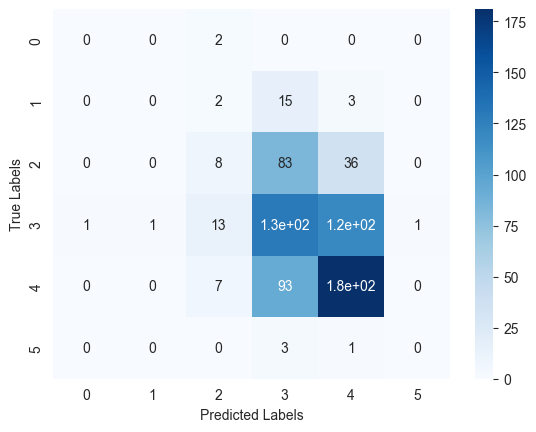

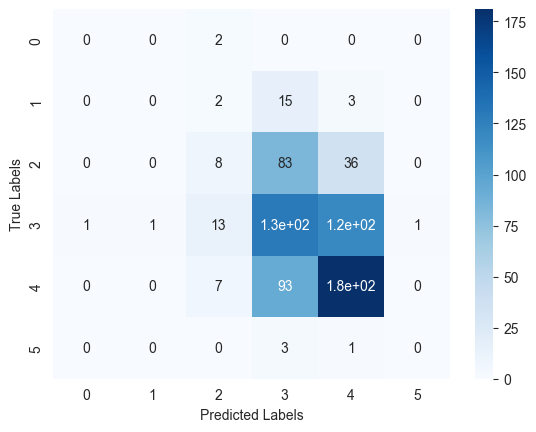

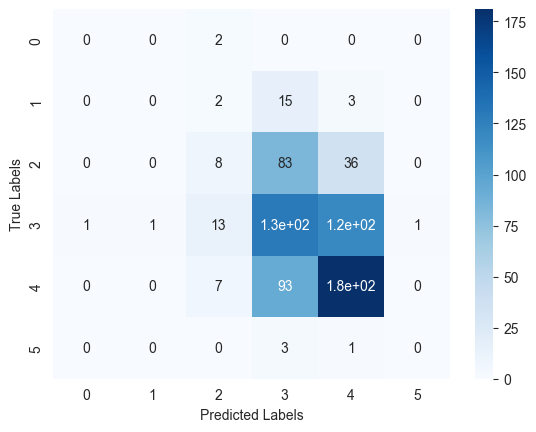

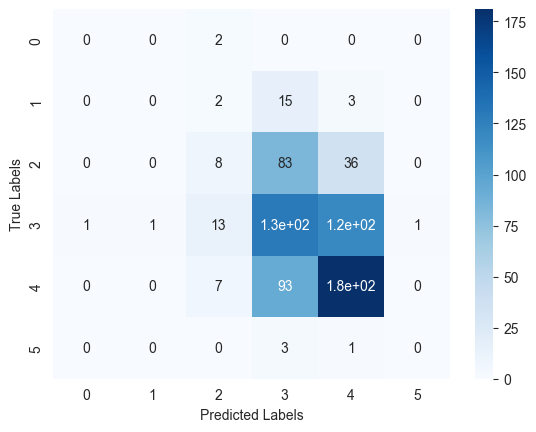

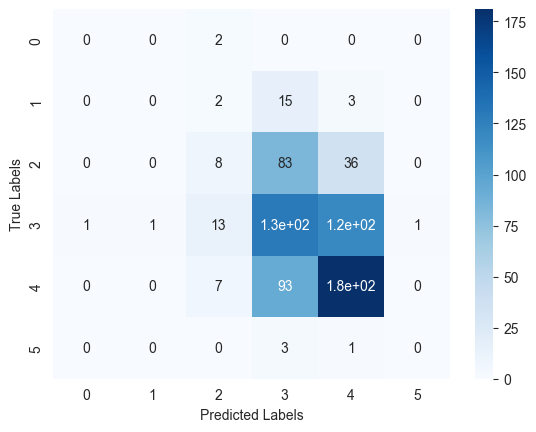

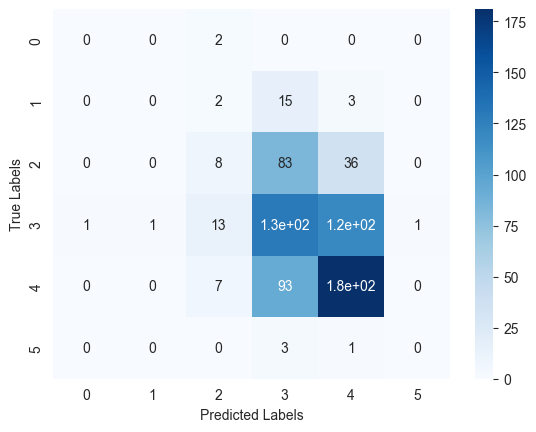

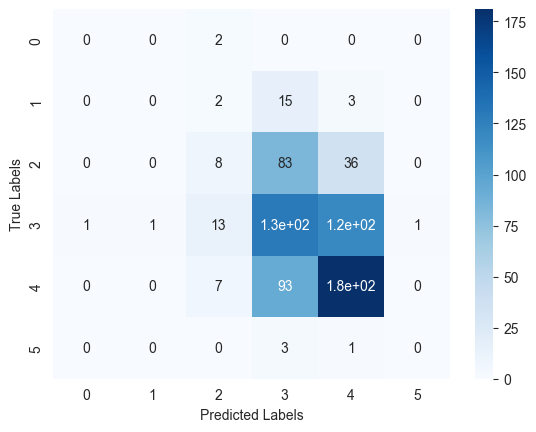

In [305]:
# Print the results
for name, result in results.items():
    print(f'{name}:')
    print('----------------------------------')
    print(f'F1 score: {result["F1 score"]}')
    print(f'Recall: {result["Recall"]}')
    print(f'Precision: {result["Precision"]}')
    print(f'Accuracy: {result["Accuracy"]}\n')

    # Plot the confusion matrix using seaborn
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

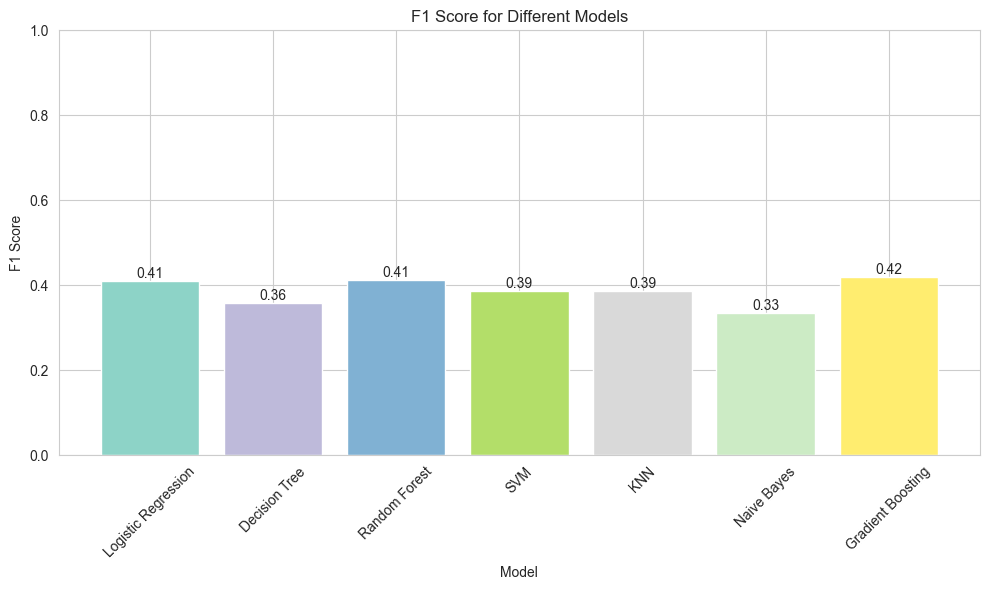

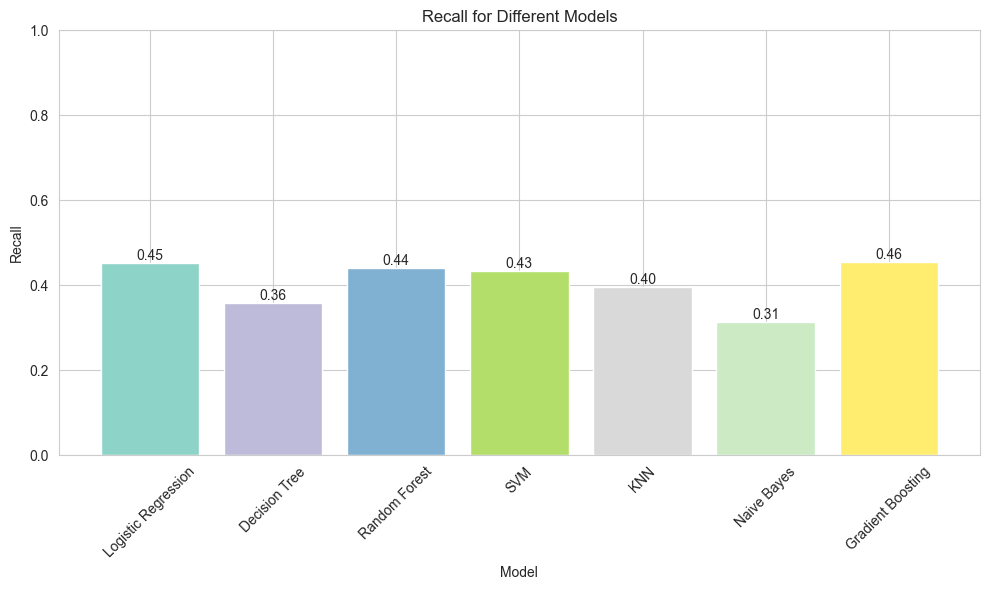

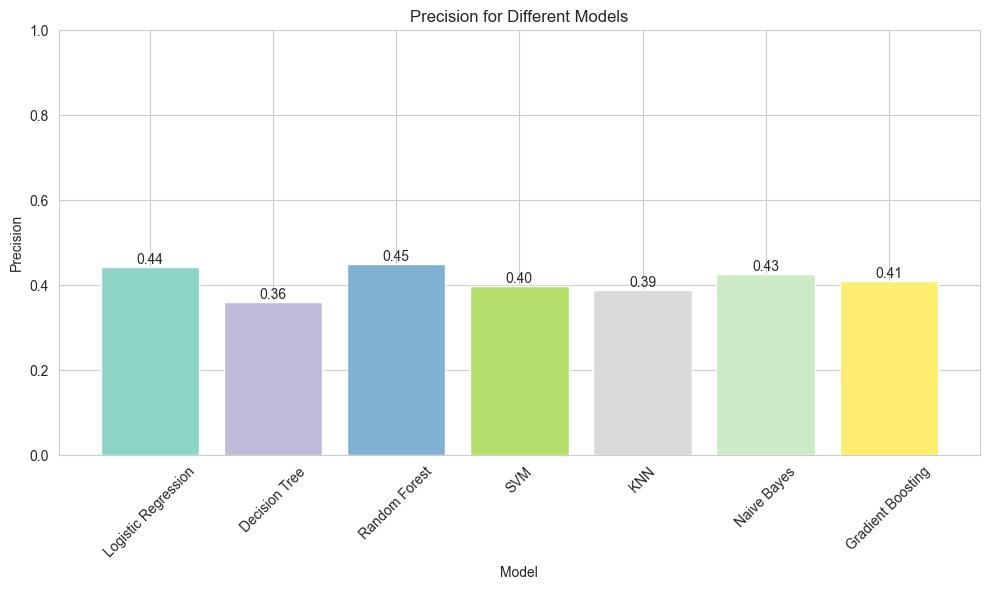

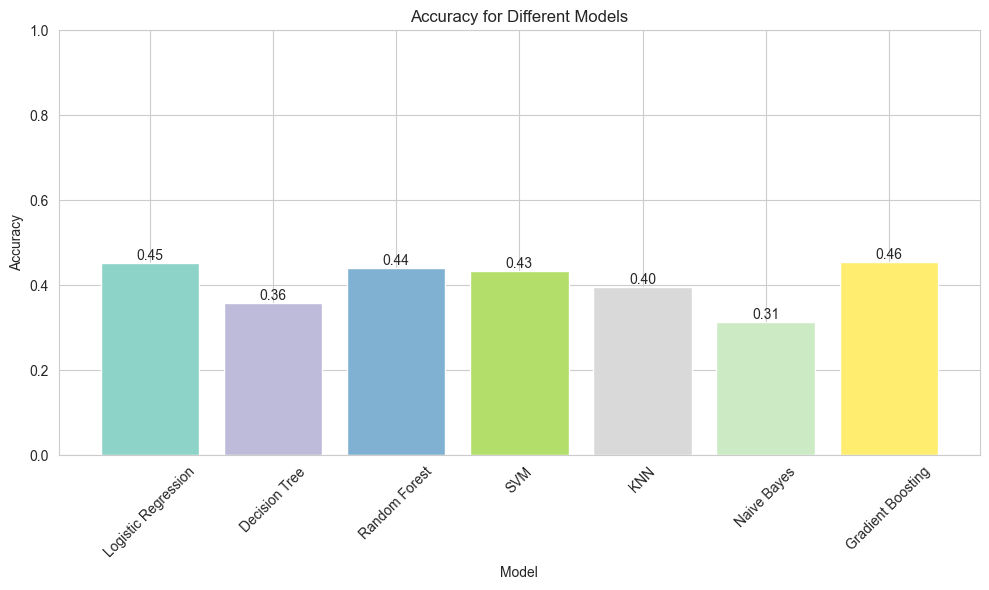

In [306]:
# Plot the results
# Extract the metrics for each model
models = list(results.keys())
f1_scores = [result['F1 score'] for result in results.values()]
recalls = [result['Recall'] for result in results.values()]
precisions = [result['Precision'] for result in results.values()]
accuracies = [result['Accuracy'] for result in results.values()]

# Set the color scheme
colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

# Plot the F1 scores
plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limits

# Add percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Improve spacing between subplots
plt.show()

# Repeat the same process for the other metrics...

# Plot the recalls
plt.figure(figsize=(10, 6))
bars = plt.bar(models, recalls, color=colors)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall for Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limits

# Add percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Improve spacing between subplots
plt.show()

# Plot the precisions
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precisions, color=colors)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision for Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limits

# Add percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Improve spacing between subplots
plt.show()

# Plot the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limits

# Add percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Improve spacing between subplots
plt.show()

## 6. Model Selection and Training

In [307]:
lr = LogisticRegression(max_iter=1000)

lr.fit(x, y_data)

# Save the model to a file
with open('harvest_classifier.pkl', 'wb') as f:
    pickle.dump(lr, f)

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## 7. Inference

In [317]:
def get_harvest_prediction(data, classifier='harvest_classifier.pkl', ordinal_encoder_obj='harvest_data_ordinal_encoded.pkl', onehot_encoder_obj='harvest_data_one_hot_encoded.pkl', scaler_obj='harvest_data_scaler.pkl', y_encoder_obj='y_data_ordinal_encoded.pkl', verbose=False):
    """
    This function predicts the harvest of a banana crop based on the given input data.
    It loads the pre-trained model, encoders, and scaler using pickle and applies them on the input data to get the predictions.

    Args:
        data (dict): A dictionary containing the input data for the prediction. It must include the following keys:
            - 'Variety': The variety of the banana crop. (str)
            - 'Agro-climatic region': The agro-climatic region where the banana crop is grown. (str)
            - 'Plant density(Min=1,Max=5)': The plant density of the banana crop. (int)
            - 'Spacing between plants (m)': The spacing between plants in meters. (float)
            - 'Plant generation': The generation of the banana crop. (int)
            - 'Fertilizer type': The type of fertilizer used for the banana crop. (str)
            - 'Soil pH': The pH value of the soil. (float)
            - 'Amount of sunlight received': The amount of sunlight received by the banana crop. (str)
            - 'Watering schedule': The watering schedule for the banana crop. (str)
            - 'Number of leaves': The number of leaves on the banana crop. (int)
            - 'Height (m)': The height of the banana crop in meters. (float)
        classifier (str): The file path of the trained classifier object. Defaults to 'harvest_classifier.pkl'.
        ordinal_encoder_obj (str): The file path of the ordinal encoder object for 'Amount of sunlight received' and 'Watering schedule' columns. Defaults to 'harvest_data_ordinal_encoded.pkl'.
        onehot_encoder_obj (str): The file path of the one-hot encoder object for 'Variety', 'Agro-climatic region', and 'Fertilizer type' columns. Defaults to 'harvest_data_one_hot_encoded.pkl'.
        scaler_obj (str): The file path of the scaler object for scaling the encoded data. Defaults to 'harvest_data_scaler.pkl'.
        y_encoder_obj (str): The file path of the ordinal encoder object for the target variable 'Harvest'. Defaults to 'y_data_ordinal_encoded.pkl'.
        verbose (bool): Whether to print the predicted probabilities with encoded values. Defaults to False.

    Returns:
        tuple: A tuple containing two elements:
            - The predicted harvest in kilograms (str).
            - A dictionary containing the predicted probabilities for each harvest range. The keys are the harvest ranges and the values are the probabilities.

    Raises:
        KeyError: If the input data dictionary is missing one or more required keys.
        TypeError: If one or more input values have an invalid data type.
        ValueError: If the input values have an invalid value range.

    """

    # Validate input data
    required_keys = [
        'Variety', 'Agro-climatic region', 'Plant density(Min=1,Max=5)', 'Spacing between plants (m)', 'Plant generation',
        'Fertilizer type', 'Soil pH', 'Amount of sunlight received', 'Watering schedule',
        'Number of leaves', 'Height (m)'
    ]
    for key in required_keys:
        if key not in data:
            raise KeyError(f"Input data is missing '{key}' key.")

    # Validate values for each key in data
    valid_values = {
        'Variety': ['Amban Banana', 'Mysore Banana', 'Pisang Awak Banana', 'Silk Banana', 'Anamalu Banana'],
        'Agro-climatic region': ['Wet Zone', 'Dry Zone', 'Intermediate Zone'],
        'Plant density(Min=1,Max=5)': [1, 2, 3, 4, 5],
        'Pesticides used(Yes, No)': ['Yes', 'No'],
        'Fertilizer type': ['Non Organic', 'None', 'Organic', 'Both used'],
        'Soil pH': (1, 14),
        'Amount of sunlight received': ['Low', 'Moderate', 'High'],
        'Watering schedule': ['randomly', 'Daily', 'none', 'twice a week', '3 times a week'],
        'Plant generation': ['1', '2', '4', '3', 'more than 5', '5']
    }

    # Validate values for each key in data
    for key in valid_values:
        if key not in data:
            raise KeyError(f"Input data is missing '{key}' key.")

        if key in valid_values:
            value = data[key]
            if isinstance(value, str):
                if value not in valid_values[key]:
                    raise ValueError(f"Invalid value '{value}' for key '{key}'. Valid values are {valid_values[key]}.")
            elif isinstance(value, (int, float)):
                if isinstance(valid_values[key], tuple):
                    if not valid_values[key][0] <= value <= valid_values[key][1]:
                        raise ValueError(f"Invalid value '{value}' for key '{key}'. Valid values are between {valid_values[key][0]} and {valid_values[key][1]}.")
                elif isinstance(valid_values[key], list):
                    if value not in valid_values[key]:
                        raise ValueError(f"Invalid value '{value}' for key '{key}'. Valid values are {valid_values[key]}.")
            else:
                raise TypeError(f"Invalid data type for key '{key}'.")
        else:
            raise KeyError(f"Invalid key '{key}' in input data.")


    # validate and Load the model from file
    try:
        with open(classifier, 'rb') as f:
            harvest_classifier = pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The trained model object `{classifier}` is not found.')

    # Load the encoder objects using pickle
    try:
        with open(ordinal_encoder_obj, 'rb') as f:
            oe = pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The ordinal encoder objects `{ordinal_encoder_obj}`are not found.')
    try:
        with open(onehot_encoder_obj, 'rb') as f:
            ohe = pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The onehot encoder objects `{onehot_encoder_obj}` are not found.')

    # Ordinal Encode categorical columns
    oe_cols = ['Amount of sunlight received', 'Watering schedule', 'Plant generation']
    # One-hot Encode categorical columns
    ohe_cols = ['Variety', 'Agro-climatic region', 'Fertilizer type', 'Pesticides used(Yes, No)']
    # columns that have numerical values
    other_columns = [
        'Plant density(Min=1,Max=5)',
        'Spacing between plants (m)',
        'Soil pH',
        'Number of leaves',
        'Height (m)'
    ]

    # data to dataframe
    data = pd.DataFrame.from_dict([data])

     # Ordinal encode data
    try:
        oe_data = oe.transform(data[oe_cols])
    except ValueError:
        raise ValueError('The values of "Amount of sunlight received" and/or "Watering schedule" are not valid.')

   # One-hot encode data
    try:
        ohe_data = ohe.transform(data[ohe_cols])
    except ValueError:
        raise ValueError('The values of "Variety", "Agro-climatic region", and/or "Fertilizer type" are not valid.')

     # get other column data
    non_categorical_data = data[other_columns].values
    # combine encoded data
    encoded_data = np.hstack([ohe_data, oe_data, non_categorical_data])

     # Load the scaler objects using pickle
    try:
        with open(scaler_obj, 'rb') as f:
            scaler = pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The scaler object `{scaler_obj}` is not found')

    try:
        normalized_data = scaler.transform(encoded_data)
    except ValueError as e:
        print(f"Error occurred while normalizing data: {e}")

    # get predictions
    pred_proba = harvest_classifier.predict_proba(normalized_data)
    pred = harvest_classifier.predict(normalized_data)

    # Load the encoder objects using pickle
    try:
        with open(y_encoder_obj, 'rb') as f:
            y_oe= pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The target variable ordinal encoder {y_encoder_obj} oject is not found')


    pred = y_oe.inverse_transform(pred.reshape(-1, 1)).flatten()
    labels = y_oe.inverse_transform(harvest_classifier.classes_.reshape(-1, 1)).flatten()

    # create predictions and probabilities dict
    pred_proba =  {label: probability for label, probability in zip(labels, pred_proba[0])}

    if verbose:
        # Print the predicted probabilities with encoded values
        print('Probabilities for each class: ')
        for i in pred_proba:
            print(f'\t{i}: {pred_proba[i]}')

    return pred[0], pred_proba

In [320]:
sample_data = {
    "Variety": "Amban Banana",
    "Agro-climatic region": "Wet Zone",
    "Plant density(Min=1,Max=5)": 1,
    "Spacing between plants (m)": 2.46,
    'Pesticides used(Yes, No)': 'Yes',
    "Plant generation": str(1),
    "Fertilizer type": "Non Organic",
    "Soil pH": 7.7,
    "Amount of sunlight received": "Low",
    "Watering schedule": "randomly",
    "Number of leaves": 16,
    "Height (m)": 2.0
}

get_harvest_prediction(data=sample_data, verbose=True)

Probabilities for each class: 
	12-14 kg: 0.003025826873342476
	15-17 kg: 0.014789577544931109
	18-20 kg: 0.04040220076415953
	21-23 kg: 0.6339715973059568
	24-26 kg: 0.12820265363447525
	27-29 kg: 0.11738961889343914
	30-32 kg: 0.06221852498369589


('21-23 kg',
 {'12-14 kg': 0.003025826873342476,
  '15-17 kg': 0.014789577544931109,
  '18-20 kg': 0.04040220076415953,
  '21-23 kg': 0.6339715973059568,
  '24-26 kg': 0.12820265363447525,
  '27-29 kg': 0.11738961889343914,
  '30-32 kg': 0.06221852498369589})